In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
import pickle
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
candidates_mapping = {
    0 : "Arthaud",
    1 : "Asselineau",
    2 : "Cheminade",
    3 : "Dupont-Aignan",
    4 : "Fillon",
    5 : "Hamon",
    6 : "Lassalle",
    7 : "Le Pen",
    8 : "Macron",
    9 : "Mélenchon",
    10 : "Poutou"
}

In [3]:
candidates_color_mapping = {
    0 : "f58231", # orange
    1 : "#808000", # olive
    2 : "#9A6324", # brown
    3 : "#800000", # maroon
    4 : "green",
    5 : "yellow",
    6 : "magenta",
    7 : "#000075", # navy
    8 : "blue",
    9 : "red",
    10 : "purple"
}

In [4]:
f = open("communities/v1/partition", "rb")
partition = pickle.load(f)
f.close()

In [5]:
f = open("communities/v1/nb_tweets_per_user", "rb")
nb_tweets_per_user = pickle.load(f)
f.close()
f = open("communities/v1/graph", "rb")
G = pickle.load(f)
f.close()

In [6]:
k = 4

In [7]:
values = list(partition.values())
# for each community, count number of users belonging to it
c = Counter(values)
# sort communities in descending order with respect to their number of users
communities_id_sorted = sorted(np.unique(values), key=c.get, reverse=True)

In [8]:
# create array where first column = community, second column = size of community
communities_counts = [(community_id, c[community_id]) for community_id in communities_id_sorted]
communities_counts = np.array(communities_counts)

In [9]:
top_communities = communities_counts[:k,0]

In [10]:
# remove parts of the graph that are unrelated to the k biggest communities
partition_filtered, G_filtered, nb_tweets_per_user_filtered = filter_graph(partition, G, \
                                                                         nb_tweets_per_user,\
                                                                         top_communities)

In [11]:
# compute new graph layout
pos = community_layout(G_filtered, partition_filtered)

/Users/lauranguyen/Documents/UPMC/M1/S2/PLDAC/PLDAC_TWITTER/community_graph.py:28: RuntimeWarning: divide by zero encountered in log
  _node_size = np.log(np.array([dict_node_size.get(node) for node in G.nodes()]))


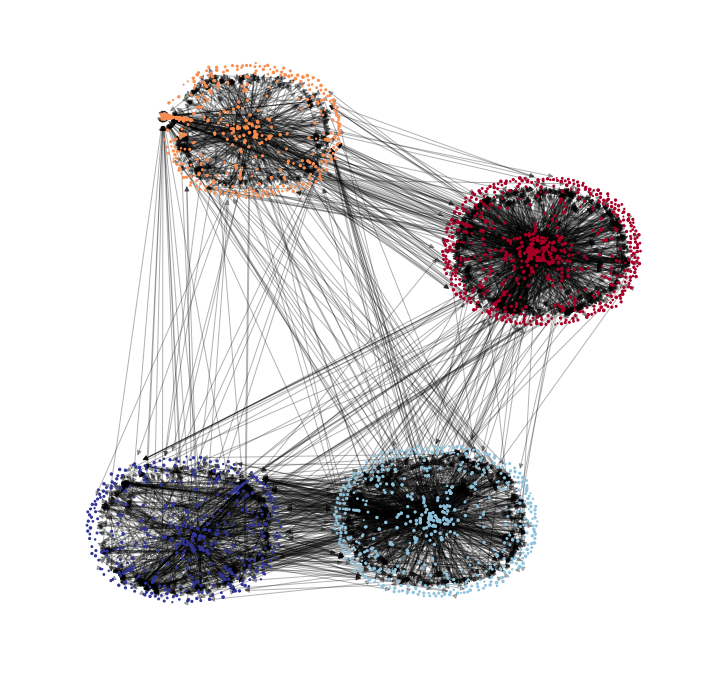

In [12]:
plot_community_graph(G_filtered, pos, partition_filtered, nb_tweets_per_user_filtered)

In [13]:
# create array out of partition_filtered
partition_filtered_array = np.array([(user_id, community) for (user_id, community) in partition_filtered.items()])

In [14]:
# create array out of nb_tweets_per_user
nb_tweets_filtered_array = np.array([(user_id, nb) for (user_id, nb) in nb_tweets_per_user_filtered.items()])

In [15]:
# element i of communities is the subarray of partition_filtered_array corresponding to the ith biggest community
communities = []
for i in range(k):
    com = partition_filtered_array[np.where(partition_filtered_array[:,1] == top_communities[i])]
    communities.append(com)

In [48]:
for i in range(k):
    # get users from ith biggest community
    users = communities[i][:,0]
    # compute average number of tweets among this community
    avg = np.mean(nb_tweets_filtered_array[np.where(np.in1d(nb_tweets_filtered_array[:,0], users))][:,1])
    candidates = mentioned_candidates_from_mult_users(tuple(users),10000)
    cand = np.argmax(np.sum(candidates, axis=0))
    print("Community {} - average number of tweets per user : {} - most mentioned candidate : {}"\
          .format(top_communities[i], avg, candidates_mapping[cand]))

Community 0 - average number of tweets per user : 301.51662049861494 - most mentioned candidate : Mélenchon
Community 6 - average number of tweets per user : 238.42930153321976 - most mentioned candidate : Macron
Community 8 - average number of tweets per user : 156.32562277580072 - most mentioned candidate : Le Pen
Community 2 - average number of tweets per user : 181.62020202020202 - most mentioned candidate : Fillon


In [50]:
top_communities

array([0, 6, 8, 2])

## Analysis of community 0

In [51]:
partition_0, G_0, nb_tweets_0 = filter_graph(partition, G, nb_tweets_per_user, [top_communities[0]])

In [52]:
pos_0 = community_layout(G_0, partition_0)

/Users/lauranguyen/Documents/UPMC/M1/S2/PLDAC/PLDAC_TWITTER/community_graph.py:28: RuntimeWarning: divide by zero encountered in log
  _node_size = np.log(np.array([dict_node_size.get(node) for node in G.nodes()]))


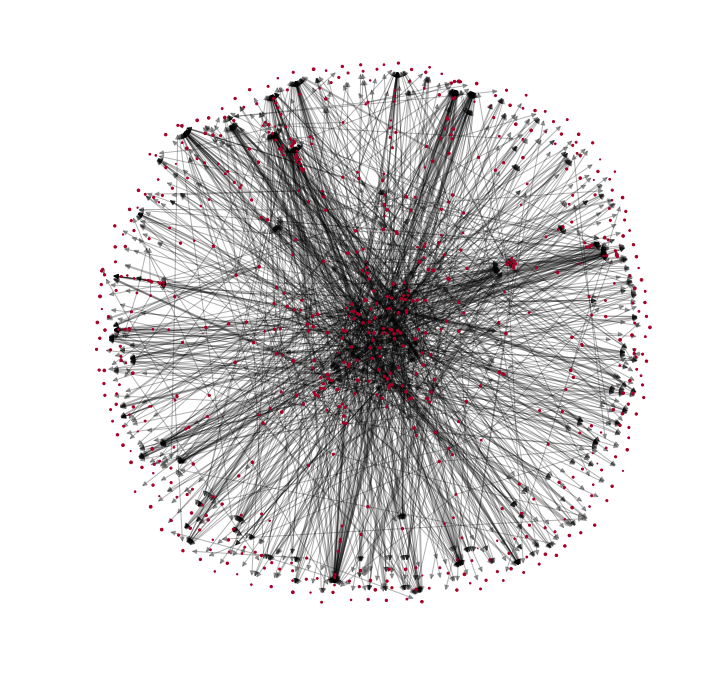

In [53]:
plot_community_graph(G_0, pos_0, partition_0, nb_tweets_0)

In [54]:
cand_colors = dict()

In [60]:
users_0 = communities[i][:,0]
for u in users_0:
    candidates = mentioned_candidates_from_user(u, N=100)
    cand_colors[u] = candidates_color_mapping[np.argmax(np.sum(candidates, axis=0))]
    print(u, cand_colors[u])

850437495296753666 red
816586346533896193 blue
3244621143 green
2334306318 blue
382001168 green
3256684565 blue
493608987 green
449524281 green
1350389808 green
575451193 #000075
2972508232 green
212271184 green
969728082 red
34570323 #000075
2874228827 green
326680674 yellow
175689829 green
4870279283 blue
78422142 blue
972791936 blue
14237828 blue
2700526273 red
556403986 #000075
475946353 green
1429819598 red
325759186 green
111593507 blue
49393889 blue
79404412 blue
451255900 green
838034979187789824 blue
2766848274 green
845032677426253824 blue
477962524 blue
3854497157 green
722848879469666305 green
248674718 green
435147065 blue
613519689 green
2858516810 green
841873818004140032 green
807123957967097856 blue
1850511716 blue
838189929561747462 blue
129425772 blue
321992083 blue
3523064182 green
1490465155 green
2627629444 green
16144449 green
3044401901 green
804701451134111744 green
1364394410 green
86775879 green
522256829 red
2288521934 blue
1969455564 blue
58233296 green
279

2275659518 green
827244764206612480 green
743097335379570688 green
1961168648 green
798032390396510208 red
253533972 green
3156498064 green
828202478764167168 blue
816499304093351936 blue
138354468 green
731434247257501696 red
150957872 blue
3014184753 #000075
18714423 blue
109522745 green
348987214 green
114675553 green
785926505180205056 green
12163732 green
301068156 green
828431373010612228 #000075
1882560492 blue
445362064 green
3060322225 #000075
306123768 red
378798016 green
556711910 red
1230073848 green
